In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
coordinates = zip(x, y)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# Make an API Call

In [7]:
# Import the requests library.
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

# Make a Request for Data to an API

In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

# Get Data from a Response

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":39.56,"feels_like":36.81,"temp_min":33.91,"temp_max":45,"pressure":1019,"humidity":78},"visibility":10000,"wind":{"speed":4,"deg":310,"gust":7},"clouds":{"all":5},"dt":1651395171,"sys":{"type":2,"id":2003257,"country":"US","sunrise":1651397962,"sunset":1651448587},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 39.56,
  'feels_like': 36.81,
  'temp_min': 33.91,
  'temp_max': 45,
  'pressure': 1019,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 310, 'gust': 7},
 'clouds': {'all': 5},
 'dt': 1651395171,
 'sys': {'type': 2,
  'id': 2003257,
  'country': 'US',
  'sunrise': 1651397962,
  'sunset': 1651448587},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Handle Request Errors

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 20:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


# Parse a Response from an API

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 39.56,
  'feels_like': 36.81,
  'temp_min': 33.91,
  'temp_max': 45,
  'pressure': 1019,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 310, 'gust': 7},
 'clouds': {'all': 5},
 'dt': 1651395171,
 'sys': {'type': 2,
  'id': 2003257,
  'country': 'US',
  'sunrise': 1651397962,
  'sunset': 1651448587},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 2,
 'id': 2003257,
 'country': 'US',
 'sunrise': 1651397962,
 'sunset': 1651448587}

In [19]:
boston_data = city_weather.json()
boston_data["sys"]["country"]

'US'

In [20]:
boston_data = city_weather.json()
boston_data["dt"]

1651395171

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 45 78 5 4


# Convert the Date Timestamp

In [22]:
boston_data = city_weather.json()
boston_data["dt"]

1651395171

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 5, 1, 8, 52, 51)

In [24]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-05-01 08:52:51'

# Get the City Weather Data

In [25]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [26]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-44.97802840603092, 158.772502287384),
 (-86.16492695632067, -101.52087042258586),
 (-20.734596209624087, 6.159524843215763),
 (-60.933565042990224, -67.00373732463737),
 (-89.93573690788047, -150.39111271179266),
 (31.83857036453695, -93.51844746190952),
 (-29.959577592894775, 82.6434784379698),
 (-89.28633005116927, -0.3666884336024907),
 (-79.52763959036746, 19.608109816881097),
 (35.52420449324984, 38.03814570201317),
 (19.048793543475114, -64.01112109816614),
 (23.000391623389163, 68.82886472742058),
 (18.741875120032518, -102.13055355223582),
 (-88.81619562812153, -159.9203087408581),
 (46.04527422244817, 100.80548405317325),
 (-14.310832498826713, -123.78748066758982),
 (-84.31864122001399, 104.2240034159621),
 (45.14327464405699, 143.458671494494),
 (43.260586339515214, 47.38569921655602),
 (66.55269796183671, -81.94380375250604),
 (-11.860814848459967, 53.399891961958275),
 (24.91796150186289, -68.38077628455889),
 (70.55481697540756, 121.59990632461393),
 (82.34077093442349

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

# Get the City Weather Data

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | te anau
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | opuwo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | natchitoches
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | manbij
Processing Record 11 of Set 1 | road town
Processing Record 12 of Set 1 | naliya
Processing Record 13 of Set 1 | la mira
Processing Record 14 of Set 1 | hovd
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mombetsu
Processing Record 18 of Set 1 | shamkhal
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | sambava
Processing Record 21 of Set 1 | cockburn town
Processing Record 22 of Set 1 | zhigansk
Processing 

Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | puerto ayora
Processing Record 40 of Set 4 | nizhniy kuranakh
Processing Record 41 of Set 4 | shaoyang
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | beidao
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | seymchan
Processing Record 48 of Set 4 | standerton
Processing Record 49 of Set 4 | sulphur
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | new glasgow
Processing Record 2 of Set 5 | aleksandrovka
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | gallup
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | port lavaca
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | jamestown
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | beringovskiy
Processing Record 11 of Set 5 | makak

Processing Record 27 of Set 8 | ronneby
Processing Record 28 of Set 8 | karup
Processing Record 29 of Set 8 | le passage
Processing Record 30 of Set 8 | jiangyou
Processing Record 31 of Set 8 | bozoum
Processing Record 32 of Set 8 | alekseyevsk
Processing Record 33 of Set 8 | vigrestad
Processing Record 34 of Set 8 | jiaohe
Processing Record 35 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | maraa
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | alugan
Processing Record 41 of Set 8 | sorland
Processing Record 42 of Set 8 | turayf
Processing Record 43 of Set 8 | buta
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | camara de lobos
Processing Record 46 of Set 8 | morondava
Processing Record 47 of Set 8 | cordoba
Processing Record 48 of Set 8 | puerto escondido
Processing Record 49 of Set 8 | lokosovo
Pr

Processing Record 14 of Set 12 | chihuahua
Processing Record 15 of Set 12 | cagliari
Processing Record 16 of Set 12 | pinar del rio
Processing Record 17 of Set 12 | bilibino
Processing Record 18 of Set 12 | mandapam
Processing Record 19 of Set 12 | klyuchevskiy
Processing Record 20 of Set 12 | kalmunai
Processing Record 21 of Set 12 | sandwick
Processing Record 22 of Set 12 | bagotville
Processing Record 23 of Set 12 | mhlume
Processing Record 24 of Set 12 | marsh harbour
Processing Record 25 of Set 12 | da nang
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | havre-saint-pierre
Processing Record 29 of Set 12 | haines junction
Processing Record 30 of Set 12 | lavrentiya
Processing Record 31 of Set 12 | evensk
Processing Record 32 of Set 12 | victor harbor
Processing Record 33 of Set 12 | amapa
Processing Record 34 of Set 12 | lakes entrance
Processing Record 35 of Set 12 | pacific grove
Processing Record 36 of Set 12 

# Create a DataFrame of City Weather Data

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.4167,167.7167,52.32,92,83,2.86,NZ,2022-05-01 08:57:53
1,Punta Arenas,-53.1500,-70.9167,42.91,87,75,6.91,CL,2022-05-01 08:57:53
2,Opuwo,-18.0607,13.8400,77.45,35,39,13.82,NA,2022-05-01 08:57:54
3,Ushuaia,-54.8000,-68.3000,44.26,70,75,19.57,AR,2022-05-01 08:57:54
4,Mataura,-46.1927,168.8643,52.48,100,100,1.12,NZ,2022-05-01 08:57:55
5,Natchitoches,31.7668,-93.1335,70.65,100,40,5.75,US,2022-05-01 08:57:56
6,Bambous Virieux,-20.3428,57.7575,82.22,78,40,10.36,MU,2022-05-01 08:57:56
7,Hermanus,-34.4187,19.2345,66.79,63,5,2.24,ZA,2022-05-01 08:57:57
8,Bredasdorp,-34.5322,20.0403,66.76,55,6,2.01,ZA,2022-05-01 08:57:58
9,Manbij,36.5281,37.9549,71.42,52,82,10.49,SY,2022-05-01 08:57:58


In [32]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Te Anau,NZ,2022-05-01 08:57:53,-45.4167,167.7167,52.32,92,83,2.86
1,Punta Arenas,CL,2022-05-01 08:57:53,-53.1500,-70.9167,42.91,87,75,6.91
2,Opuwo,NA,2022-05-01 08:57:54,-18.0607,13.8400,77.45,35,39,13.82
3,Ushuaia,AR,2022-05-01 08:57:54,-54.8000,-68.3000,44.26,70,75,19.57
4,Mataura,NZ,2022-05-01 08:57:55,-46.1927,168.8643,52.48,100,100,1.12
...,...,...,...,...,...,...,...,...,...
547,Kieta,PG,2022-05-01 09:14:26,-6.2167,155.6333,80.55,80,100,0.87
548,Acapulco,MX,2022-05-01 09:14:26,16.8634,-99.8901,76.82,83,40,5.75
549,Tupaciguara,BR,2022-05-01 09:14:27,-18.5922,-48.7050,60.82,57,0,4.97
550,Capitao Poco,BR,2022-05-01 09:14:27,-1.7464,-47.0594,70.68,98,62,1.79


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

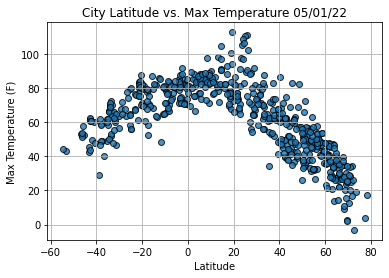

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Plot Latitude vs. Humidity

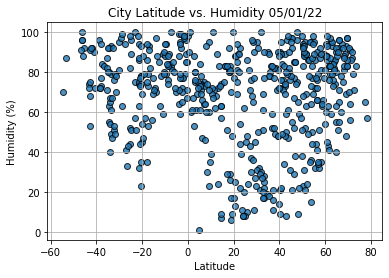

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs. Cloudiness

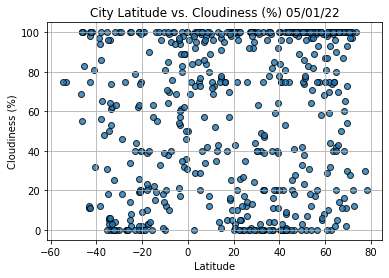

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs. Wind Speed

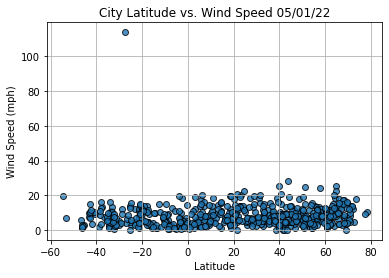

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a Linear Regression Function

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# Create the Hemisphere DataFrames


In [40]:
index13 = city_data_df.loc[13]
index13

City                         Hovd
Country                        MN
Date          2022-05-01 08:58:01
Lat                       48.0056
Lng                       91.6419
Max Temp                    68.68
Humidity                        9
Cloudiness                     98
Wind Speed                   9.53
Name: 13, dtype: object

In [41]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
547    False
548     True
549    False
550    False
551     True
Name: Lat, Length: 552, dtype: bool

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Natchitoches,US,2022-05-01 08:57:56,31.7668,-93.1335,70.65,100,40,5.75
9,Manbij,SY,2022-05-01 08:57:58,36.5281,37.9549,71.42,52,82,10.49
10,Road Town,VG,2022-05-01 08:57:59,18.4167,-64.6167,78.22,80,100,12.28
11,Naliya,IN,2022-05-01 08:58:00,23.2667,68.8333,97.77,39,5,20.18
12,La Mira,MX,2022-05-01 08:58:00,18.0350,-102.3266,69.33,80,57,4.61


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

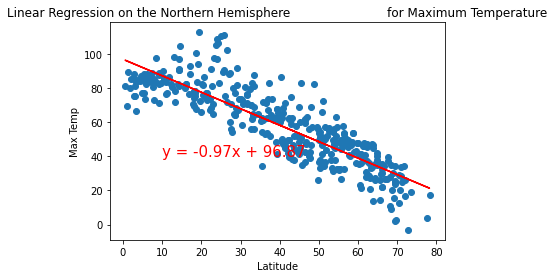

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Find the Correlation Between Latitude and Percent Humidity

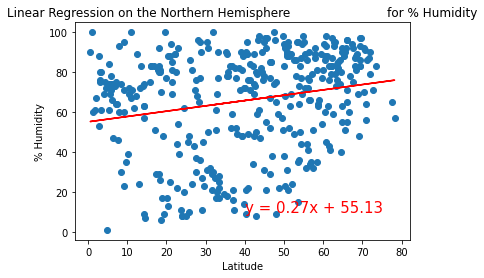

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere


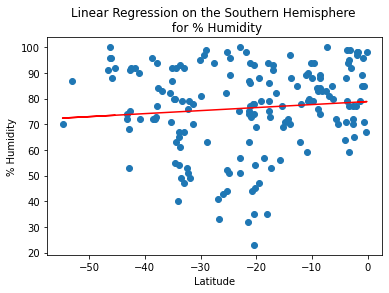

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Find the Correlation Between Latitude and Percent Cloudiness


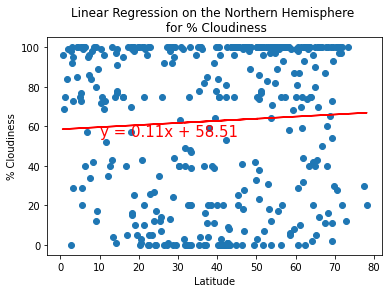

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere 

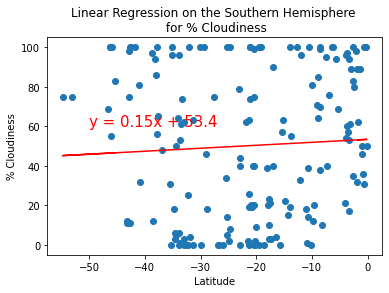

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# Find the Correlation Between Latitude and Wind Speed

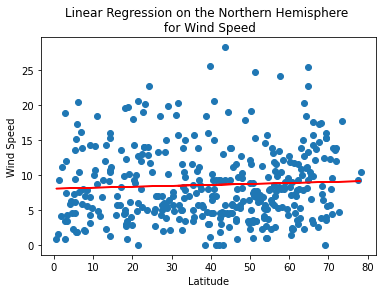

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))